In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tilda-400-64x64-patches/good/211_patch2-3.png
/kaggle/input/tilda-400-64x64-patches/good/240_patch2-6.png
/kaggle/input/tilda-400-64x64-patches/good/005_patch1-5.png
/kaggle/input/tilda-400-64x64-patches/good/391_patch1-6.png
/kaggle/input/tilda-400-64x64-patches/good/290_patch3-0.png
/kaggle/input/tilda-400-64x64-patches/good/149_patch3-4.png
/kaggle/input/tilda-400-64x64-patches/good/358_patch5-2.png
/kaggle/input/tilda-400-64x64-patches/good/110_patch7-0.png
/kaggle/input/tilda-400-64x64-patches/good/016_patch3-1.png
/kaggle/input/tilda-400-64x64-patches/good/333_patch1-1.png
/kaggle/input/tilda-400-64x64-patches/good/317_patch2-5.png
/kaggle/input/tilda-400-64x64-patches/good/306_patch1-0.png
/kaggle/input/tilda-400-64x64-patches/good/298_patch6-0.png
/kaggle/input/tilda-400-64x64-patches/good/032_patch2-6.png
/kaggle/input/tilda-400-64x64-patches/good/105_patch4-7.png
/kaggle/input/tilda-400-64x64-patches/good/241_patch2-7.png
/kaggle/input/tilda-400-64x64-patches/go

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight


Split 1/5
Epoch 1/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 88s 37ms/step - accuracy: 0.4775 - loss: 1.6840 - val_accuracy: 0.2801 - val_loss: 6.7174
Epoch 2/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.5995 - loss: 1.1815 - val_accuracy: 0.4668 - val_loss: 1.7013
Epoch 3/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.6497 - loss: 1.1153 - val_accuracy: 0.7793 - val_loss: 0.6897
Epoch 4/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7420 - loss: 0.8656 - val_accuracy: 0.7232 - val_loss: 0.6724
Epoch 5/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7437 - loss: 0.7601 - val_accuracy: 0.9182 - val_loss: 0.3456
Epoch 6/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7743 - loss: 0.6669 - val_accuracy: 0.8943 - val_loss: 0.4735
Epoch 7/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7996 - loss: 0.6129 - val_accuracy: 0.0773 - val_loss: 18.1404
Epoch 8/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7780 - los

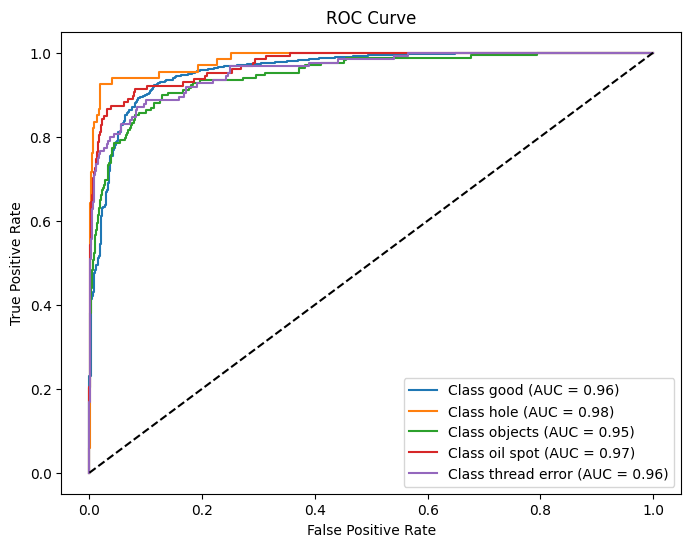


Split 2/5
Epoch 1/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.4152 - loss: 1.6808 - val_accuracy: 0.0225 - val_loss: 2.7549
Epoch 2/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.5656 - loss: 1.1732 - val_accuracy: 0.7186 - val_loss: 0.7124
Epoch 3/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6071 - loss: 1.0157 - val_accuracy: 0.9252 - val_loss: 0.3417
Epoch 4/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7321 - loss: 0.8702 - val_accuracy: 0.6258 - val_loss: 0.9408
Epoch 5/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.6920 - loss: 0.8484 - val_accuracy: 0.6781 - val_loss: 0.6570
Epoch 6/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7367 - loss: 0.6821 - val_accuracy: 0.4951 - val_loss: 1.2706
Epoch 7/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7822 - loss: 0.6163 - val_accuracy: 0.9215 - val_loss: 0.4637
Epoch 8/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.8237 - loss

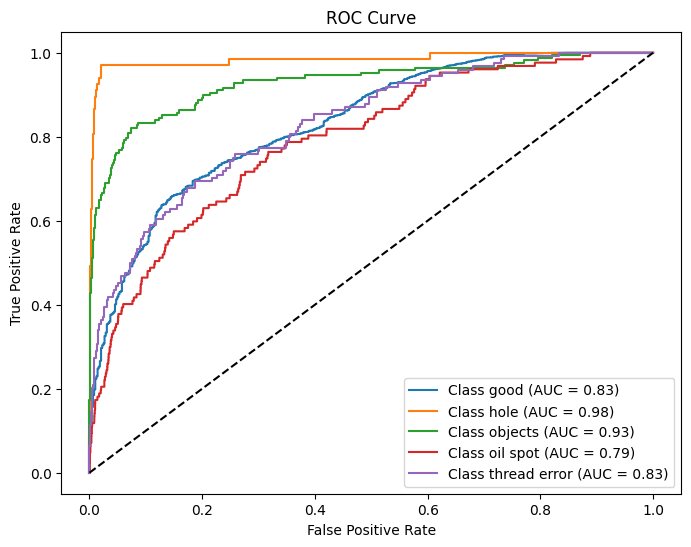


Split 3/5
Epoch 1/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 87s 33ms/step - accuracy: 0.4077 - loss: 1.6413 - val_accuracy: 0.7512 - val_loss: 85.5938
Epoch 2/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.5729 - loss: 1.1202 - val_accuracy: 0.1762 - val_loss: 3.1558
Epoch 3/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.6321 - loss: 1.0637 - val_accuracy: 0.5801 - val_loss: 1.0488
Epoch 4/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.7013 - loss: 0.9155 - val_accuracy: 0.8736 - val_loss: 0.3983
Epoch 5/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7484 - loss: 0.7324 - val_accuracy: 0.6961 - val_loss: 0.7663
Epoch 6/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7850 - loss: 0.6376 - val_accuracy: 0.5344 - val_loss: 1.2891
Epoch 7/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7707 - loss: 0.5799 - val_accuracy: 0.8410 - val_loss: 0.4987
Epoch 8/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.8113 - los

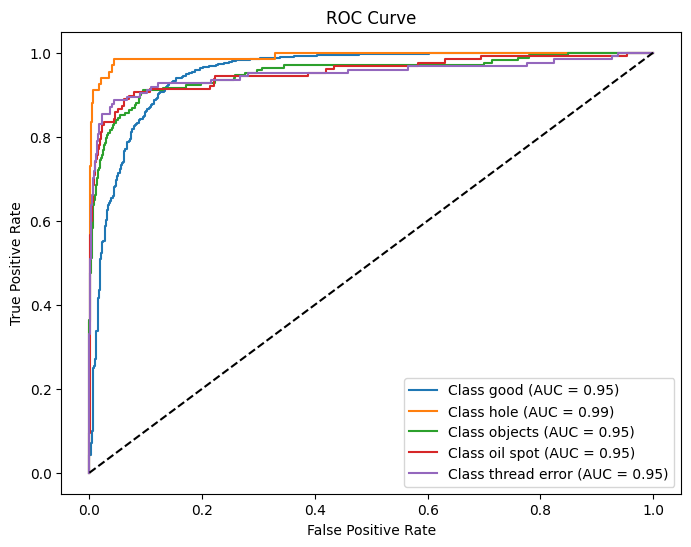


Split 4/5
Epoch 1/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 86s 34ms/step - accuracy: 0.4128 - loss: 1.5931 - val_accuracy: 0.5084 - val_loss: 1.4074
Epoch 2/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.6296 - loss: 1.1236 - val_accuracy: 0.2969 - val_loss: 1.8241
Epoch 3/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.6971 - loss: 1.0139 - val_accuracy: 0.8361 - val_loss: 0.5199
Epoch 4/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7477 - loss: 0.8364 - val_accuracy: 0.6414 - val_loss: 1.0943
Epoch 5/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7931 - loss: 0.6697 - val_accuracy: 0.8838 - val_loss: 0.3939
Epoch 6/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7746 - loss: 0.5944 - val_accuracy: 0.8350 - val_loss: 0.4967
Epoch 7/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.8092 - loss: 0.5298 - val_accuracy: 0.8404 - val_loss: 0.5143
Epoch 8/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.8420 - loss

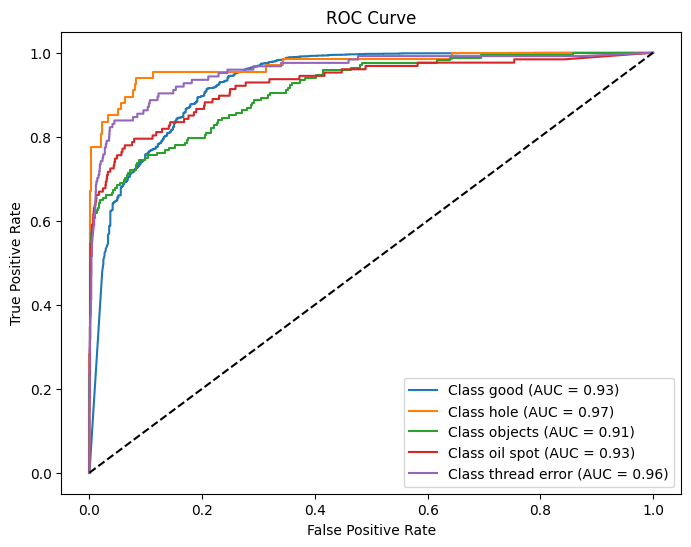


Split 5/5
Epoch 1/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 88s 34ms/step - accuracy: 0.4307 - loss: 1.6482 - val_accuracy: 0.0332 - val_loss: 88.8970
Epoch 2/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.6130 - loss: 1.1494 - val_accuracy: 0.0436 - val_loss: 3.4886
Epoch 3/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.6689 - loss: 0.9712 - val_accuracy: 0.6615 - val_loss: 0.8846
Epoch 4/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7032 - loss: 0.8885 - val_accuracy: 0.7330 - val_loss: 0.6867
Epoch 5/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7230 - loss: 0.6957 - val_accuracy: 0.9230 - val_loss: 0.3544
Epoch 6/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7260 - loss: 0.7349 - val_accuracy: 0.8602 - val_loss: 0.3938
Epoch 7/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7598 - loss: 0.5591 - val_accuracy: 0.8322 - val_loss: 0.6200
Epoch 8/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.8208 - los

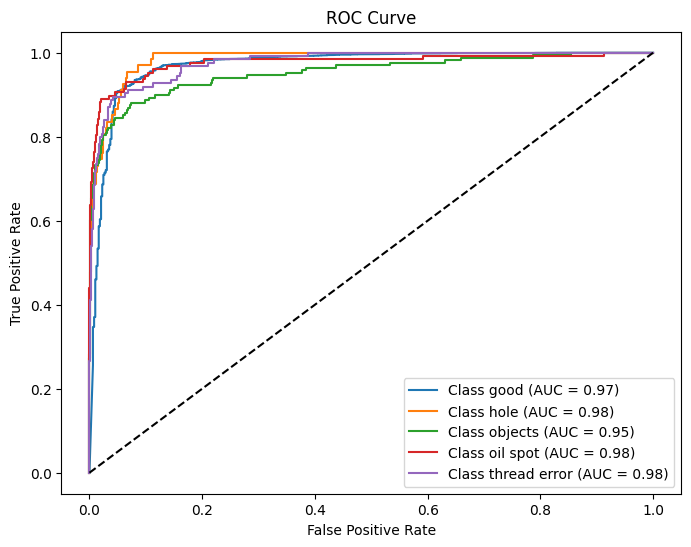

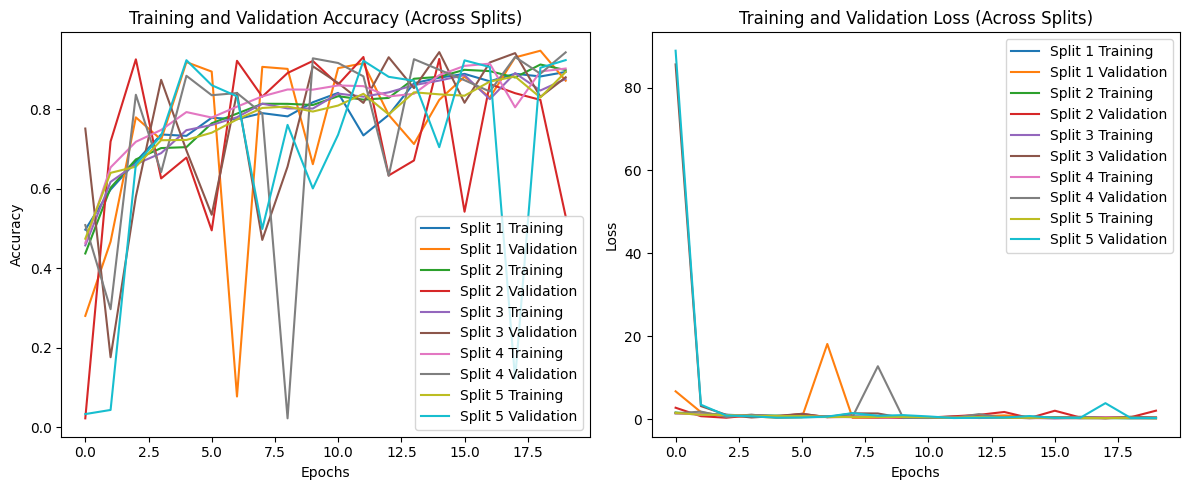

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import label_binarize
import os

# Dataset parameters
data_dir = '/kaggle/input/tilda-400-64x64-patches'
img_size = (64, 64)
batch_size = 32
num_classes = 5
class_names = ['good', 'hole', 'objects', 'oil spot', 'thread error']

# Load and preprocess data
images = []
labels = []

for class_index, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir, class_name)
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        img = load_img(file_path, target_size=img_size)
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(class_index)

images = np.array(images)
labels = np.array(labels)

# Perform 5 randomized holdout splits
num_splits = 5
results = []

for split in range(num_splits):
    print(f"\nSplit {split + 1}/{num_splits}")

    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=split)

    # Compute class weights
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights)}

    # One-hot encode labels
    y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
    y_val_one_hot = to_categorical(y_val, num_classes=num_classes)

    # Build Model
    base_model = EfficientNetB0(include_top=False, input_shape=(*img_size, 3), weights='imagenet')
    base_model.trainable = True  # Unfreeze for fine-tuning

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the Model
    epochs = 20
    history = model.fit(
        X_train, y_train_one_hot,
        validation_data=(X_val, y_val_one_hot),
        epochs=epochs,
        batch_size=batch_size,
        class_weight=class_weights,
        verbose=1
    )

    # Evaluate Model
    val_preds = model.predict(X_val)
    predicted_classes = np.argmax(val_preds, axis=1)
    true_classes = y_val

    # Classification Report
    print("Classification Report:")
    report = classification_report(true_classes, predicted_classes, target_names=class_names, output_dict=True)
    print(classification_report(true_classes, predicted_classes, target_names=class_names))

    # Confusion Matrix
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    print("Confusion Matrix:")
    print(conf_matrix)

    # ROC Curve and AUC
    y_val_bin = label_binarize(y_val, classes=range(num_classes))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], val_preds[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC Curves
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Store results
    results.append({
        "split": split + 1,
        "history": history.history,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "roc_auc": roc_auc
    })

# Plot aggregate metrics
plt.figure(figsize=(12, 5))

# Aggregate Accuracy and Loss
for split_result in results:
    history = split_result["history"]

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label=f"Split {split_result['split']} Training")
    plt.plot(history['val_accuracy'], label=f"Split {split_result['split']} Validation")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy (Across Splits)')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label=f"Split {split_result['split']} Training")
    plt.plot(history['val_loss'], label=f"Split {split_result['split']} Validation")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss (Across Splits)')
    plt.legend()

plt.tight_layout()
plt.show()
